<h1>Sampling</h1>

For digital signal processing a time continuous signal $s(t)$ must be sampled. By this, the values of the signal are recorded at time discrete timestamps $n$ forming the sampled signal $s_a(n)$:

$s_a(n) = s(n\cdot T)$

The time between two neighbouring recordings or samples is called sampling time $T$.
The inverse of the sampling time $T$ is the samplerate $r$:

$r=\frac{1}{T}$

Example:
A time continuous sinus has a frequency of $220$ Hz (blue signal).
It is sampled with a samplerate of $r=1$ kHz.
The sampled signal is plotted red.

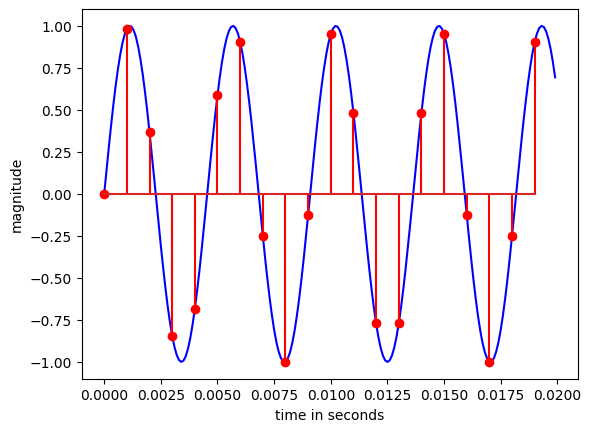

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def TimeContinuousFunction(t, FrequencyInHertz = 220):
    return np.sin(2*np.pi*FrequencyInHertz*t)

r = 1000 # samplerate in Hertz
UpsamplingFactor = 10
t = np.arange(200)/(UpsamplingFactor*r) # simulation of time continuous function by ten times faster sampling
s = TimeContinuousFunction(t)

t_a = t[0::UpsamplingFactor]
s_a = TimeContinuousFunction(t_a)

plt.plot(t  , s  , 'b')
plt.stem(t_a, s_a, 'r')
plt.xlabel('time in seconds')
plt.ylabel('magnitude')
plt.show()

The sampling theorem states, that the highest frequency $f_c$ of the time-continuous signal $s(t)$ must be lower or equal than half of the samplerate:

$f_c \leq \frac{1}{2T}$

This condition is fullfilled in the example above.

<h1>Interpolation</h1>

Interpolation is the task to reconstruct the envelope $\tilde{s}(t)$ over the sampled values. If the sampling theorem is fullfilled, the envelope is a good approximation of the original signal.
There are several ways to evaluate the envelope of a signal. In the context of interpolation, the envelope is evaluated by a lowpass filter $h(t)$ applied to the sampled signal:

$\tilde{s}(t) = s_a(nT) * h_(t)$

A simple prototype for a lowpass filter is the sinc-function, which is the perfect lowpass with cutoff frequency $f_c=\frac{1}{2T}$:

$h_\text{LP}(t)=\text{sinc} \left( \frac {t}{T} \right)$

The simple structure of $s_a(t)$ results in a very simple convolution:
For each sampled value of $s_a(t)$ a weighted version of the lowpass $h(t)$ is added up:

$\tilde{s}(t) = s_a(nT) * h_(t)=\sum_{n=-\infty}^\infty s_a(n) \cdot h_\text{LP}(t - nT)$

This reconstruction by the perfect lowpass $h_\text{LP}$ is shown in the following. The reconstructed signal is plotted in black. It can be seen, that errors only occurs in the beginning and ending of the observed time sequence.

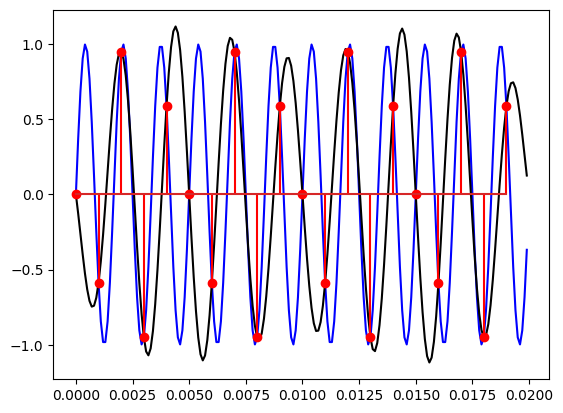

In [5]:
def InterpolationFilter(x):
    return np.sinc(x)

def ReconstructedSignal(s_a, t, r, InterpolationFilterFunctionPointer = InterpolationFilter):
    s_tilde = np.zeros(t.shape)
    for n in range(s_a.shape[0]):
        h = InterpolationFilterFunctionPointer(t*r - n)
        s_tilde += s_a[n] * h
    return s_tilde

plt.plot(t, s, 'b')
plt.plot(t, ReconstructedSignal(s_a, t, r), 'k')
plt.stem(t_a, s_a, 'r')
plt.show()

The reconstruction (black) of the original signal (blue) is not perfect due to the limitation of the lowpass to $N$ zeros in positive and negative direction. If the lowpass would be of infinite length, the reconstruction would be perfekt:

$\tilde{s}(t)=s(t)$

## Extrapolation
For interpolation, new samples between two known samples are estimated by any kind of envelope between the two known samples. If you want to estimate the envelope and by this also new samples outside of known samples, this is called extrapolation.

In order to clarify the difference between interpolation and extrapolation, the following example shows an envelope estimation by three data points. If the envelope of these three data points is to be assumed a parable, the envelope can be estimated to match these three data points exactly.

All black points in the range $0\leq t \leq 2$ are interpolated.
All other points on the black curve are extrapolated, because they lie outside the interval with known samples.

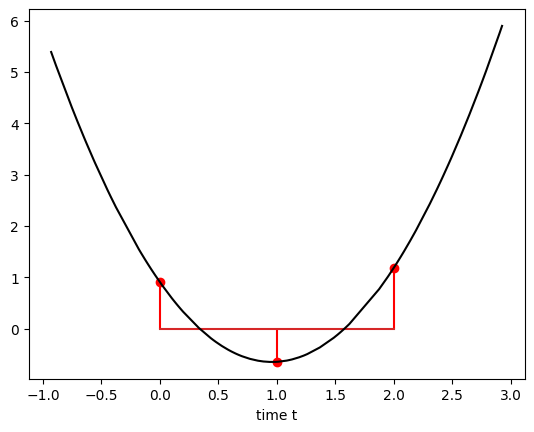

In [6]:
t_vector = np.arange(3)
x = np.random.randn(t_vector.shape[0])
a = np.array([[t_vector[0]**2, t_vector[0], 1], [t_vector[1]**2, t_vector[1], 1], [t_vector[2]**2, t_vector[2], 1]])
CoefficientsOfParable = np.linalg.solve(a, x)

t_tilde = np.sort(np.random.rand(100) * 4 - 1)
x_tilde = CoefficientsOfParable[0] * (t_tilde**2) + CoefficientsOfParable[1] * t_tilde + CoefficientsOfParable[2]
plt.stem(t_vector, x, 'r')
plt.plot(t_tilde, x_tilde, 'k')
plt.xlabel('time t')
plt.show()

## Alias
If the sampling theorem is violated, the reconstruction of the envelope fails. The resulting error is called alias.

Assuming the same lowpass filter for evaluating the envelope, the frequency of the sinus is increased to $600$ Hz. Obviously, there is less than two samples per period of the sinus. Therefore, the sampling theorem is violated and the reconstruction by the lowpass filter fails (black signal):

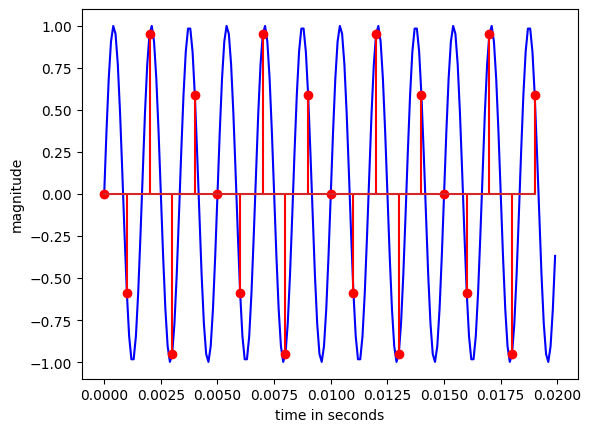

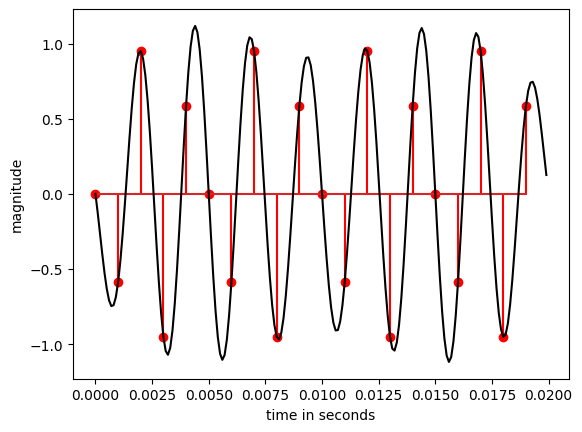

In [7]:
FrequencyInHertz = 600
s = TimeContinuousFunction(t, FrequencyInHertz)
s_a = TimeContinuousFunction(t_a, FrequencyInHertz)
plt.plot(t  , s  , 'b')
plt.stem(t_a, s_a, 'r')
plt.xlabel('time in seconds')
plt.ylabel('magnitude')
plt.show()
plt.stem(t_a, s_a, 'r')
plt.plot(t, ReconstructedSignal(s_a, t, r), 'k')
plt.xlabel('time in seconds')
plt.ylabel('magnitude')
plt.show()

## Downsampling
The sampling theorem states, that the following condition must be met, if Alias should be avoided:

$f_c \leq \frac{1}{2T}$

Assuming that the highest frequency $f_c$ of a signal $y(n)$ is much less than half of the sampling rate:

$f_c \ll \frac{1}{2T}$ 

In this case, it is possible to reduce the sampling rate $r=\frac{1}{T}$ by a factor $N$:

$N\cdot f_c \leq \frac{1}{2T}$

$\rightarrow N\leq \frac{1}{2Tf_c}=\frac{r}{2f_c}$

This reducing of sampling rate is called downsampling. If $N$ is an integer value, the downsampling is a very simple algorithm:

$y_\text{downsampled}(n)=y\left(N\cdot n\right)$

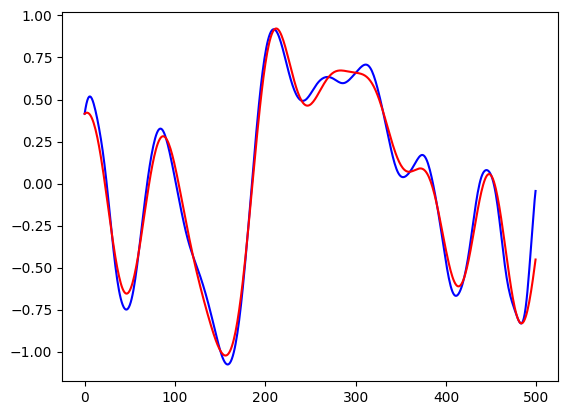

SNR =  17.35275601110702


In [8]:
r = 48000
x = np.random.randn(50)
fc = 8000
t = np.arange(x.shape[0]) / r
y = np.zeros(x.shape)
for n in range(x.shape[0]):    
    y += x[n] * np.sinc(2*fc*(t - n/r)) * 2 * fc / r

N = 10
t = np.arange(y.shape[0] * N) / (r*N)
z1 = ReconstructedSignal(y, t, r)
DownSamplingFactor = r // (2*fc)

y_Downsampled = y[0::DownSamplingFactor]
z2 = ReconstructedSignal(y_Downsampled, t, r / DownSamplingFactor)
plt.plot(z1, 'b')
plt.plot(z2, 'r')
plt.show()
SNR = 10*np.log10(np.sum(z1**2) / np.sum((z1-z2)**2))
print('SNR = ', SNR)

## Programming exercise:
The simplest form of interpolation is a linear interpolation. For a linear interpolation, the envelope is simply a direct line between two neighbouring samples. The interpolation samples this piecewise linear envelope.

Write the two missing procedures 

In [9]:
import unittest

def Triangle(x):
    return np.maximum(1 - np.abs(x), 0.0)

def EvaluateUpsampledTimeAxisWithoutExtrapolation(t, r, UpsamplingFactor):
    ### solution begins
    t_tilde = np.arange((t.shape[0]-1)*UpsamplingFactor + 1) / (r*UpsamplingFactor)
    ### solution ends
    return t_tilde

def ReconstructedSignalLinear(s_a, t, r):
    s_tilde = np.zeros(t.shape)
    ### solution begins
    s_tilde = ReconstructedSignal(s_a, t, r, Triangle)
    ### solution ends
    return s_tilde

r = np.random.randint(50) + 50
x = np.random.randn(10)
t = np.arange(x.shape[0]) / r
UpsamplingFactor = np.random.randint(10) + 2

class TestProgrammingExercise(unittest.TestCase):

    def test_RangeUpsampledTimeAxis(self):
        t_tilde = EvaluateUpsampledTimeAxisWithoutExtrapolation(t, r, UpsamplingFactor)
        self.assertAlmostEqual(t[0], t_tilde[0], delta = 1e-10)
        self.assertAlmostEqual(t[-1], t_tilde[-1], delta = 1e-10)

    def test_LengthUpsampledTimeAxis(self):
        t_tilde = EvaluateUpsampledTimeAxisWithoutExtrapolation(t, r, UpsamplingFactor)
        self.assertGreater(t.shape[0] * UpsamplingFactor, t_tilde.shape[0])
        self.assertLess((t.shape[0] - 1) * UpsamplingFactor, t_tilde.shape[0])

    def test_EquallySampledTimeAxis(self):
        t_tilde = EvaluateUpsampledTimeAxisWithoutExtrapolation(t, r, UpsamplingFactor)
        T = np.diff(t_tilde)
        self.assertAlmostEqual(np.mean(T), 1 / (r * UpsamplingFactor), delta = 1e-10)
        self.assertAlmostEqual(np.std(T), 0, delta = 1e-10)        
        
    def test_UpsamplingDownsampling(self):        
        t_tilde = EvaluateUpsampledTimeAxisWithoutExtrapolation(t, r, UpsamplingFactor)
        x_tilde = ReconstructedSignalLinear(x, t_tilde, r)
        for n in range(x.shape[0]):
            self.assertAlmostEqual(x[n], x_tilde[n*UpsamplingFactor], delta = 1e-10)

    def test_Linearity(self):        
        t_tilde = EvaluateUpsampledTimeAxisWithoutExtrapolation(t, r, UpsamplingFactor)
        x_tilde = ReconstructedSignalLinear(x, t_tilde, r)
        idx1 = 0
        idx2 = UpsamplingFactor + 1
        while idx2 < x_tilde.shape[0]:
            x_block = x_tilde[idx1:idx2]
            Delta_x_block = np.diff(x_block)
            self.assertAlmostEqual(np.std(Delta_x_block), 0.0, delta = 1e-10)
            idx1 += UpsamplingFactor
            idx2 += UpsamplingFactor
        
# https://stackoverflow.com/questions/40172281/unit-tests-for-functions-in-a-jupyter-notebook
unittest.main(argv=[''], verbosity=2, exit=False)

test_EquallySampledTimeAxis (__main__.TestProgrammingExercise.test_EquallySampledTimeAxis) ... ok
test_LengthUpsampledTimeAxis (__main__.TestProgrammingExercise.test_LengthUpsampledTimeAxis) ... ok
test_Linearity (__main__.TestProgrammingExercise.test_Linearity) ... ok
test_RangeUpsampledTimeAxis (__main__.TestProgrammingExercise.test_RangeUpsampledTimeAxis) ... ok
test_UpsamplingDownsampling (__main__.TestProgrammingExercise.test_UpsamplingDownsampling) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.009s

OK


## Exam preparation:

1) A time continuous signal $x(t)=\cos\left(7\cdot t\right)^2$ is sampled by $r=10$ Hz. Evaluate the first five samples.

2) The signal from task 1) should be upsampled to $r=20$ Hz by a linear interpolation algorithm. Evaluate the first five samples of the upsampled signal and their corresponding time positions in time-continuous domain.

3) The time discrete signal is $x=[0, 1, -2, 1, 0]$ with $r=48$ kHz. Sketch a rough estimation of the interpolated signal produced by the ideal lowpass. Sketch the ideal lowpass.

4) A time discrete signal sampled with $r=32$ kHz is filtered by a lowpass with a cutoff frequency of $f_c=3400$ Hz. What is the lowest necessary sampling frequency after the lowpass. What is the maximum allowed integer downsampling factor? Corresponds the signal after the lowpass to wideband speech or to narrowband speech?

5) A microfone signal $y(n)$ is recorded with $r=48$ kHz. Afterwards, $y(n)$ is filtered by a bandpass $h(n)$ with cutoff frequencies $f_1=100$ Hz and $f_2=7000$ Hz: $z(n)=h(n)*y(n)$. Does $z(n)$ has a DC component? Are human voices understandable in $z(n)$? What are the highest frequencies in $y(n)$ and $z(n)$?